# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [144]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 設定 data_path
dir_data = './data/Part01/'

### 之前做過的處理

In [145]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [146]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

(array([13679., 33111., 38424., 41746., 40356., 34339., 33544., 32650.,
        27685., 11977.]),
 array([20.51780822, 25.37808219, 30.23835616, 35.09863014, 39.95890411,
        44.81917808, 49.67945205, 54.53972603, 59.4       , 64.26027397,
        69.12054795]),
 <a list of 10 Patch objects>)

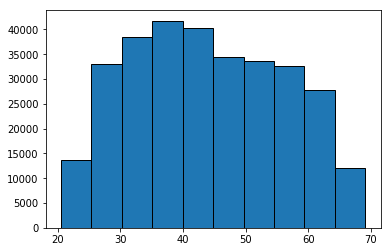

In [148]:
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k')

            TARGET        AGE
AGE_GP                       
(20, 25]  0.123036  23.377522
(25, 30]  0.111436  27.822518
(30, 35]  0.102814  32.479037
(35, 40]  0.089414  37.555913
(40, 45]  0.078491  42.459346
(45, 50]  0.074171  47.462741
(50, 55]  0.066968  52.593136
(55, 60]  0.055314  57.491131
(60, 65]  0.052737  62.412459
(65, 70]  0.037270  66.555108


Text(0, 0.5, 'Failure to Repay (%)')

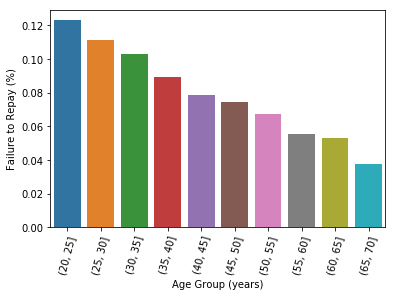

In [149]:
bin_cut =  [20,25,30,35,40,45,50,55,60,65,70]

age_target = pd.DataFrame({"TARGET":app_train["TARGET"],"AGE":app_train["DAYS_BIRTH"]/365})
age_target["AGE_GP"] = pd.cut(age_target["AGE"],bins=bin_cut)
age_target.set_index("AGE_GP",drop=True,inplace=True)
print(age_target.groupby("AGE_GP").mean())

sns.barplot(age_target.groupby("AGE_GP").mean().index, age_target.groupby("AGE_GP").mean()["TARGET"])
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')

In [150]:
age_target["TARGET"].corr(age_target["AGE"])

-0.07823930830982713

In [151]:
a = app_train["AMT_INCOME_TOTAL"][~app_train["AMT_INCOME_TOTAL"].isnull()].dropna()
a.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

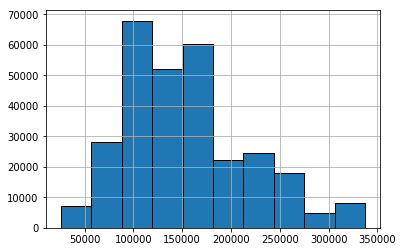

In [152]:
IQR = np.percentile(a, q = 75) -np.percentile(a, q = 25)
app_train["AMT_INCOME_TOTAL_NORICHMAN"] = app_train.loc[app_train["AMT_INCOME_TOTAL"] <= (np.percentile(a, q = 75) + 1.5*IQR) ]["AMT_INCOME_TOTAL"]
app_train["AMT_INCOME_TOTAL_NORICHMAN"].hist(edgecolor = 'k')

                        TARGET  AMT_INCOME_TOTAL_NORICHMAN
INCOME_GP                                                 
(25338.15, 56835.0]   0.074639                47178.074245
(56835.0, 88020.0]    0.083464                72537.796049
(88020.0, 119205.0]   0.085332               103278.791670
(119205.0, 150390.0]  0.085288               134035.459059
(150390.0, 181575.0]  0.085170               168018.009522
(181575.0, 212760.0]  0.080079               200909.326811
(212760.0, 243945.0]  0.075807               225281.816080
(243945.0, 275130.0]  0.070222               262082.949535
(275130.0, 306315.0]  0.070942               292460.583007
(306315.0, 337500.0]  0.061144               320376.934283


Text(0, 0.5, 'Failure to Repay (%)')

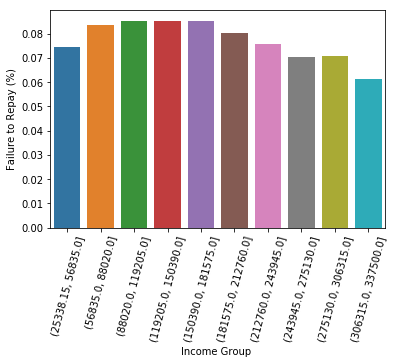

In [153]:
income_target = pd.DataFrame({"TARGET":app_train["TARGET"],"AMT_INCOME_TOTAL_NORICHMAN":app_train["AMT_INCOME_TOTAL_NORICHMAN"]})
income_target["INCOME_GP"] = pd.cut(income_target["AMT_INCOME_TOTAL_NORICHMAN"],10)
income_target.set_index("INCOME_GP",inplace=True)
print(income_target.groupby("INCOME_GP").mean())

sns.barplot(income_target.groupby("INCOME_GP").mean().index, income_target.groupby("INCOME_GP").mean()["TARGET"])
plt.xticks(rotation = 75); plt.xlabel('Income Group '); plt.ylabel('Failure to Repay (%)')

In [154]:
income_target["TARGET"].corr(income_target["AMT_INCOME_TOTAL_NORICHMAN"])

-0.015508035136474694